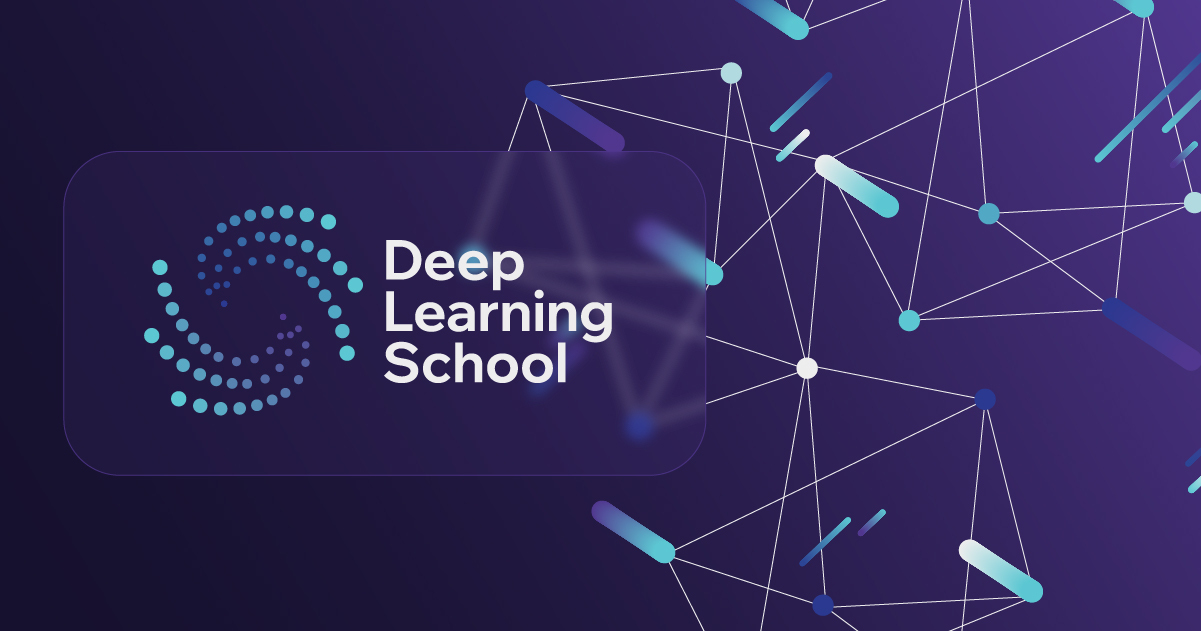

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

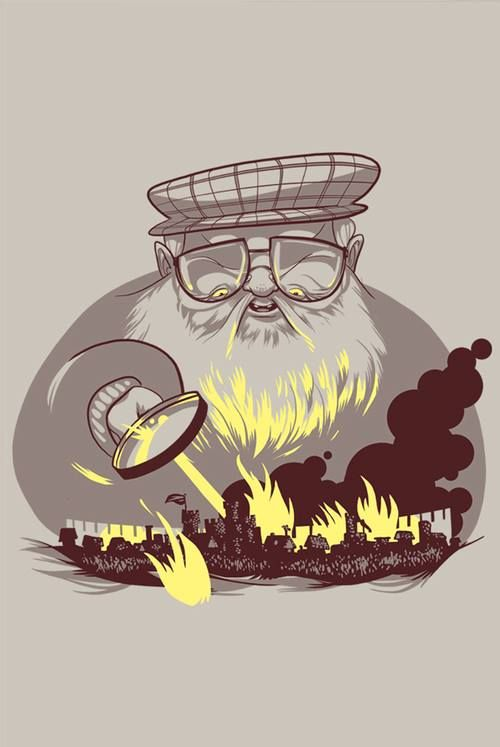

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 50.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 54.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [ ]:
nan_summary = data.isnull().sum()
missing_percent = (nan_summary / len(data)) * 100
missing_percent[missing_percent > 0]

,0
title,53.949904
culture,68.657675
dateOfBirth,82.080925
mother,98.843931
father,98.587026
heir,98.651252
house,24.470135
spouse,87.154785
isAliveMother,98.843931
isAliveFather,98.587026


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
unnecessary_columns = ['mother', 'father', 'heir', 'name', 'isAliveSpouse',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'spouse'
                      ] # данные признаки имеют много Nan
data.drop(columns=unnecessary_columns, inplace=True)
data_test.drop(columns=unnecessary_columns, inplace=True)

# Находим строки, где пропущено много информации, но персонаж выжил(для уменьшения дисбаланса классов)
condition = (
    (data['isAlive'] == 1) &
    (data['title'].isna()) &
    (data['culture'].isna()) &
    (data['dateOfBirth'].isna()) &
    (data['house'].isna()) &
    (data['age'].isna())
)

indices_to_drop = data[condition].index

data = data.drop(indices_to_drop)

In [ ]:
data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,11,0.605351,0
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,Ser,1,NaN,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0.267559,1
4,Queen,0,NaN,82.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,NaN,NaN,NaN,1,0,1,1,0,0,1,NaN,0,0.160535,1
1554,NaN,0,NaN,NaN,NaN,1,1,0,0,0,0,0,NaN,0,0.040134,0
1555,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,1,0,0,NaN,0,0.076923,0


In [ ]:
data['isAlive_rule'] = (data['dateOfBirth'] + data['age'] == 305).astype(int)

data_test['isAlive_rule'] = (data_test['dateOfBirth'] + data_test['age'] == 305).astype(int)

Среднее = 35.29032258064516
Медиана = 24.0


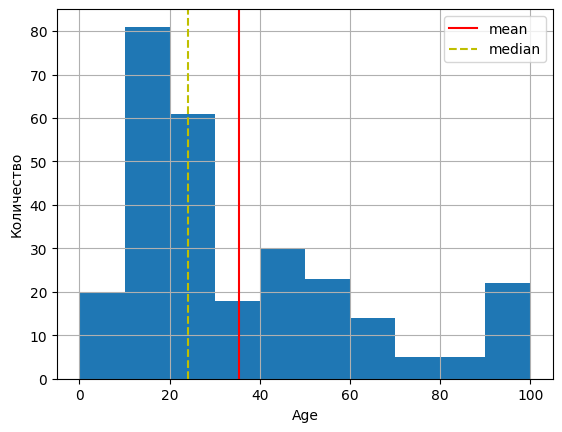

In [ ]:
mean_age = np.mean(data['age'].dropna().values)
median_age = np.quantile(data['age'].dropna(), q=0.5)
print(f"Среднее = {mean_age}")
print(f"Медиана = {median_age}")

plt.hist(data['age'])

plt.axvline(x=mean_age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_age, color='y', linestyle = '--', label='median')

plt.legend(fontsize=10)
plt.xlabel("Age",fontsize=10)
plt.ylabel("Количество",fontsize=10)

plt.grid()

plt.show()

In [ ]:
data['age'] = data['age'].fillna(round(mean_age))
data['dateOfBirth'] = data['dateOfBirth'].fillna(-1)


data_test['age'] = data['age'].fillna(round(np.mean(data_test['age'].dropna().values)))
data_test['dateOfBirth'] = data_test['dateOfBirth'].fillna(-1)

In [ ]:
# Объединение титулов
def group_titles(title):
    if pd.isna(title):
        return 'unknownTitle'
    elif 'Lord' in title or 'Lady' in title:
        return 'Nobility'
    elif 'Maester' in title or 'Archmaester' in title:
        return 'Maester'
    elif 'Prince' in title or 'Princess' in title:
        return 'Prince'
    elif 'King' in title or 'Queen' in title:
        return 'Monarch'
    elif 'KhalKo (formerly)' in title:
        return 'Khal'
    elif 'Master' in title:
        return 'Master'
    else:
        return title

data['title'] = data['title'].apply(group_titles)

title_counts = data['title'].value_counts()
rare_titles = title_counts[title_counts < 4].index
data['title'] = data['title'].replace(rare_titles, 'OtherTitle')



data_test['title'] = data_test['title'].apply(group_titles)

title_counts = data_test['title'].value_counts()
rare_titles = title_counts[title_counts < 4].index
data_test['title'] = data_test['title'].replace(rare_titles, 'OtherTitle')

In [ ]:
data['house'] = data['house'].fillna(data['house'].mode()[0])



data_test['house'] = data_test['house'].fillna(data_test['house'].mode()[0])

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


Среднее = 0.06392912970772127
Медиана = 0.0267558528428093


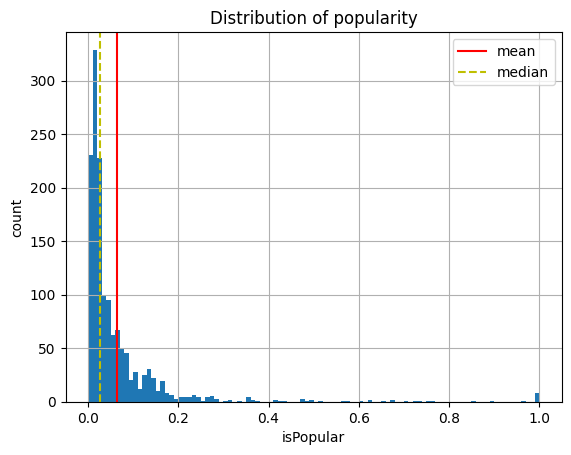

In [ ]:
mean_popularity = np.mean(data['popularity'].dropna().values)
median_popularity = np.quantile(data['popularity'].dropna(), q=0.5)
print(f"Среднее = {mean_popularity}")
print(f"Медиана = {median_popularity}")

data['popularity'].hist(density=False, bins=100)

plt.axvline(x=mean_popularity, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_popularity, color='y', linestyle = '--', label='median')

plt.legend()
plt.ylabel('count')
plt.xlabel('isPopular')
plt.title('Distribution of popularity')

plt.show()

In [ ]:
thresholdPop = 0.5
data['isPopular'] = np.where(data['popularity'] >= thresholdPop, 1, 0)
data['boolDeadRelations'] = np.where(data['numDeadRelations'] > 0, 1, 0)
data.drop(columns='popularity', inplace=True)
data.drop(columns='numDeadRelations', inplace=True)



data_test['isPopular'] = np.where(data_test['popularity'] >= thresholdPop, 1, 0)
data_test['boolDeadRelations'] = np.where(data_test['numDeadRelations'] > 0, 1, 0)
data_test.drop(columns='popularity', inplace=True)
data_test.drop(columns='numDeadRelations', inplace=True)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
def replace_culture(value):
    if pd.isna(value):  # Проверяем на NaN
        return 'unknownCulture'

    for general_name, variants in cult.items():
        if value.lower() in [v.lower() for v in variants]:
            return general_name
    return 'unknownCulture'


data['culture'] = data['culture'].apply(replace_culture)
culture_counts = data['culture'].value_counts()
rare_culture = culture_counts[culture_counts < 10].index
data['culture'] = data['culture'].replace(rare_culture, 'OtherСulture')

data_test['culture'] = data_test['culture'].apply(replace_culture)
culture_counts = data_test['culture'].value_counts()
rare_culture = culture_counts[culture_counts < 10].index
data_test['culture'] = data_test['culture'].replace(rare_culture, 'OtherСulture')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
# выполнено наверху
# считаю, что от такого нужно в начале избавляться. Иначе значения Nan ненужных столбцов отвлекают

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

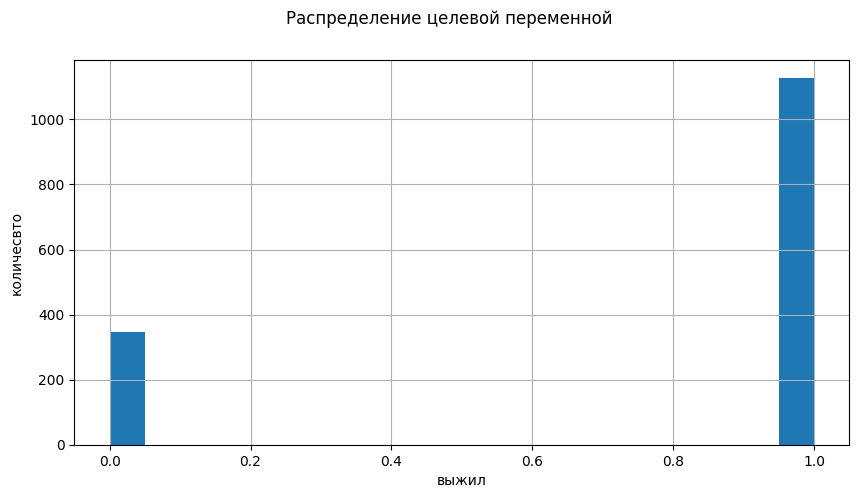

In [ ]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('количесвто')
plt.xlabel('выжил')

plt.suptitle('Распределение целевой переменной')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
categorical_columns = ['title', 'house', 'culture']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoding.fit_transform(data[column])

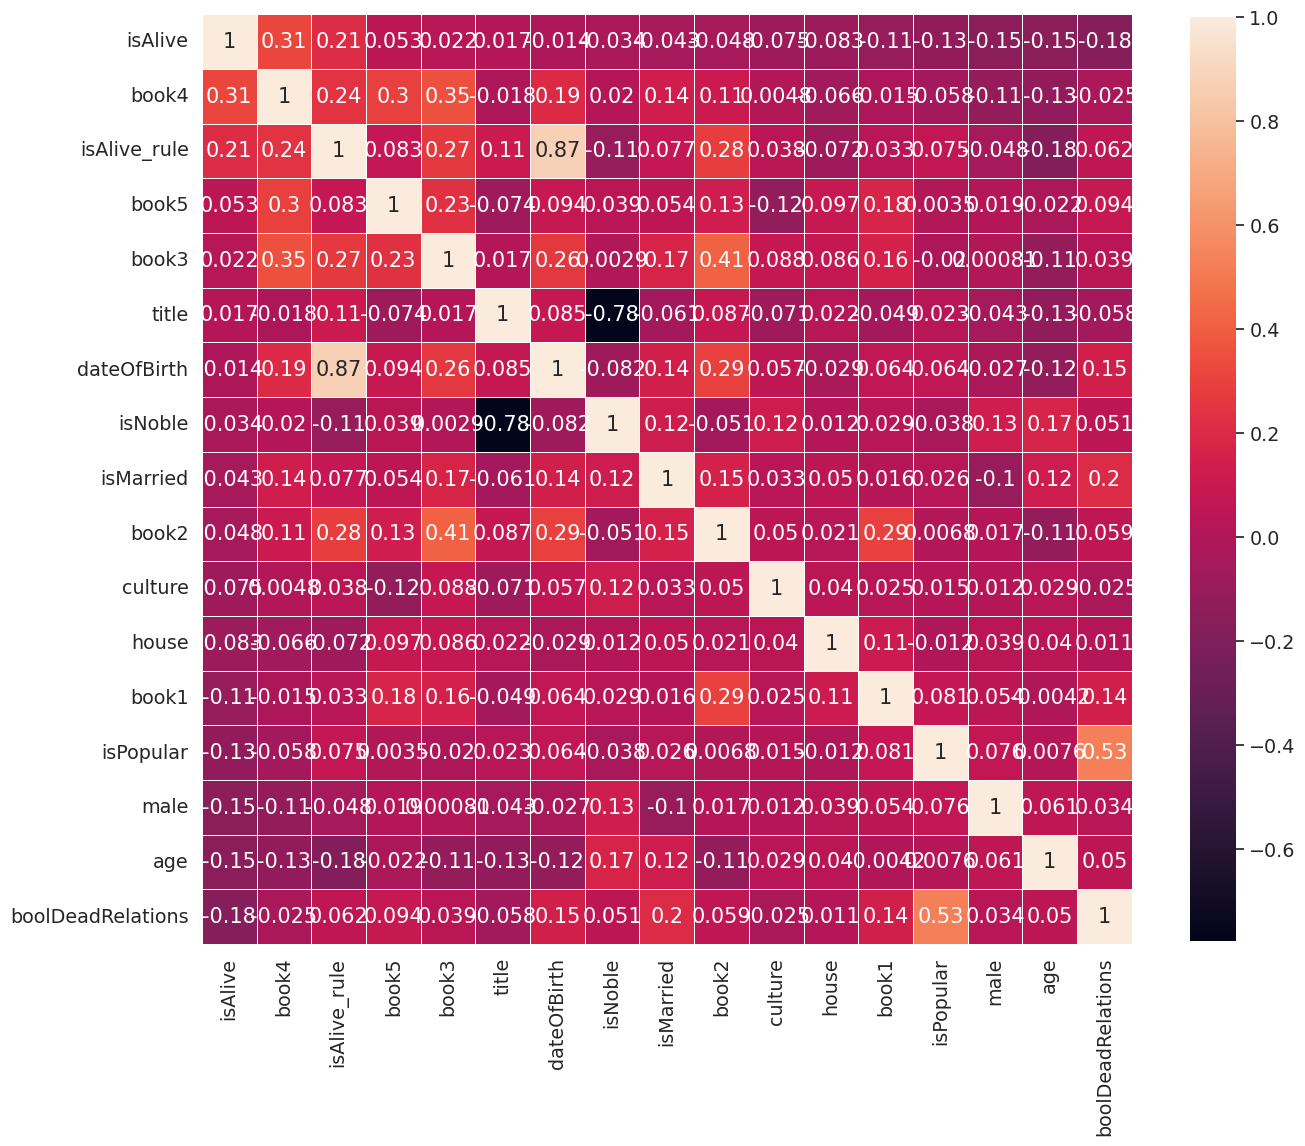

In [ ]:
corrmat = data.corr()

plt.figure(figsize=(15, 15))
k = 25
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cbar_kws={"shrink": 0.8}, annot=True, linewidths=0.5, square=True, annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

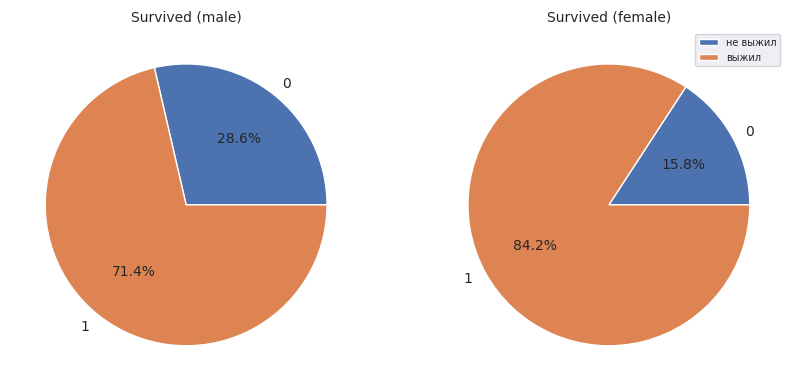

In [ ]:
data_1 = data[data['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

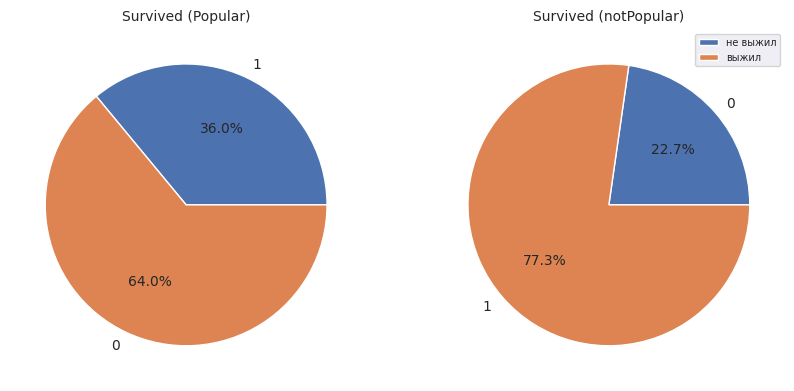

In [ ]:
data_1 = data[data['isPopular']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isPopular']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (Popular)', fontsize=10)
ax2.set_title('Survived (notPopular)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

In [ ]:
corr_with_target = data.corr(numeric_only=True)['isAlive'].sort_values(ascending=False)
print(corr_with_target)

isAlive              1.000000
book4                0.314044
isAlive_rule         0.212356
book5                0.053110
book3                0.021891
title                0.016927
dateOfBirth         -0.013669
isNoble             -0.034365
isMarried           -0.042779
book2               -0.048291
culture             -0.074972
house               -0.083424
book1               -0.106481
isPopular           -0.125863
male                -0.148539
age                 -0.150462
boolDeadRelations   -0.179250
Name: isAlive, dtype: float64


In [ ]:
categorical_columns = ['house', 'culture', 'title']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

data_test_encoded = pd.get_dummies(data_test, columns=categorical_columns)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
data_encoded.head(5)

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,title_4,title_5,title_6,title_7,title_8,title_9,title_10,title_11,title_12,title_13
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,-1.0,0,0,0,0,0,0,0,35.0,...,False,False,False,False,False,False,False,False,False,True
2,1,208.0,1,1,1,1,1,1,1,97.0,...,False,True,False,False,False,False,False,False,False,False
3,1,-1.0,0,0,0,1,0,0,1,35.0,...,False,False,False,False,False,False,True,False,False,False
4,0,82.0,0,0,0,0,0,1,1,23.0,...,True,False,False,False,False,False,False,False,False,False
5,0,276.0,0,0,0,1,0,1,1,29.0,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
X = data_encoded.drop(columns=['isAlive'])
y = data_encoded['isAlive']


# Добавляем недостающие колонки (из X) в test_data_aligned и заполняем их 0
missing_cols = set(X.columns) - set(data_test_encoded.columns)
for col in missing_cols:
    data_test_encoded[col] = 0

# Удаляем лишние колонки (которых нет в X)
extra_cols = set(data_test_encoded.columns) - set(X.columns)
data_test_encoded = data_test_encoded.drop(columns=extra_cols)

# Убедимся, что порядок колонок совпадает с X
data_test_encoded = data_test_encoded[X.columns]

<ipython-input-27-ac63d74b04a1>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_test_encoded[col] = 0
<ipython-input-27-ac63d74b04a1>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_test_encoded[col] = 0
<ipython-input-27-ac63d74b04a1>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# ниже

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train)):.2f}')
    print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test)):.2f}')
    print('------')
    return model

# Рассчитываем веса классов
classes = np.unique(y_train)
weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))


models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(class_weight=class_weights, min_samples_leaf=1, min_samples_split=2, n_estimators=200),
    "Gaussian Process": GaussianProcessClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(weights='distance', n_neighbors=5),
    "SVC": SVC(class_weight='balanced', probability=True),
    "Decision Tree": DecisionTreeClassifier(class_weight=class_weights)
}

# Обучение и оценка всех моделей
results = {}
for name, model in models.items():
    results[name] = train_and_evaluate(model, X_train, y_train, X_test, y_test, name)

Logistic Regression Accuracy: 0.7647
MSE train = 0.12
MSE test = 0.24
------
AdaBoost Accuracy: 0.6742
MSE train = 0.24
MSE test = 0.33
------
Random Forest Accuracy: 0.8507
MSE train = 0.03
MSE test = 0.15
------
Gaussian Process Accuracy: 0.7964
MSE train = 0.06
MSE test = 0.20
------
Naive Bayes Accuracy: 0.4796
MSE train = 0.26
MSE test = 0.52
------
KNN Accuracy: 0.8235
MSE train = 0.05
MSE test = 0.18
------
SVC Accuracy: 0.8145
MSE train = 0.08
MSE test = 0.19
------
Decision Tree Accuracy: 0.8778
MSE train = 0.03
MSE test = 0.12
------


In [ ]:
best_model = results['Decision Tree']

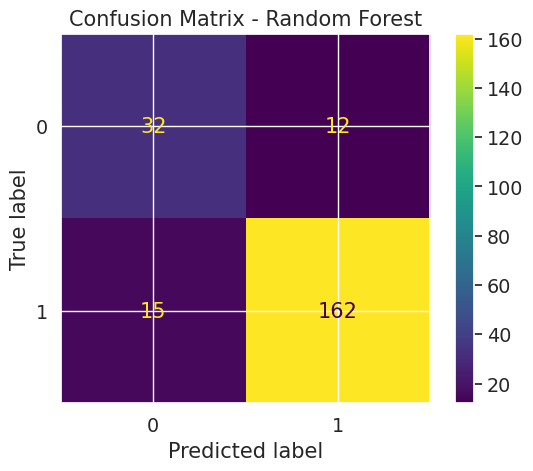

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Предсказания Random Forest
y_pred_rf = best_model.predict(X_test)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# выполнил выше

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# выполнил выше

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
scaler.fit(data_test_encoded)

data_test_scaled = scaler.transform(data_test_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
predictions = best_model.predict(data_test_scaled)

submission['isAlive'] = predictions

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)